Es sabido que, una entidad que presta servicios o productos (pudiera ser una
empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de
cliente desarrollando productos personalizados en pos de las preferencias y
necesidades de cada uno de sus clientes.

El set de datos potencial contiene datos sobre clientes de una institución
financiera:
- Customer ID: ID asociado al cliente
- Age: Edad en años del cliente
- Income: Ingreso anual del cliente
- Family: Tamaño del grupo familiar del cliente
- CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
- Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)
- Mortgage: Monto de la hipoteca (0 indica que no posee)
- ZIP Code: Código postal del domicilio

En la última campaña a cada cliente se le ofreció un producto personalizado
en base a su comportamiento financiero, preferencias, capacidad de pago y
necesidades. La variable target corresponde a Personal Loan el cual indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto
ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.

Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen
mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar
a los clientes con dichas características y priorizarlos a ellos en las próximas
campañas.

a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué
columnas le hacen sentido incluir en un modelo para predecir si un cliente
tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde
que puede usar la función drop('nombre columna a eliminar', axis=1).

In [2]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
  
df = pd.read_excel("CDM5AE9-Data.xlsx")
print(df)

        ID  Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0        1   25      49     91107       4    1.6          1         0   
1        2   45      34     90089       3    1.5          1         0   
2        3   39      11     94720       1    1.0          1         0   
3        4   35     100     94112       1    2.7          2         0   
4        5   35      45     91330       4    1.0          2         0   
...    ...  ...     ...       ...     ...    ...        ...       ...   
4995  4996   29      40     92697       1    1.9          3         0   
4996  4997   30      15     92037       4    0.4          1        85   
4997  4998   63      24     93023       2    0.3          3         0   
4998  4999   65      49     90034       3    0.5          2         0   
4999  5000   28      83     92612       3    0.8          1         0   

      Personal Loan  
0                 0  
1                 0  
2                 0  
3                 0  
4            

In [5]:
df1 = df.drop(['ID'], axis=1) 

In [6]:
df1.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000


In [13]:
df1.dtypes

Age                int64
Income             int64
ZIP Code           int64
Family             int64
CCAvg            float64
Education          int64
Mortgage           int64
Personal Loan      int64
dtype: object

b) Determine cuáles son las variables predictoras que son categorías y obtenga
las variables dummies correspondientes para incluirlas en el modelo.
Recuerde que puede usar la función get_dummies() de pandas.

In [7]:
df2 = pd.get_dummies(df1)
df2

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,25,49,91107,4,1.6,1,0,0
1,45,34,90089,3,1.5,1,0,0
2,39,11,94720,1,1.0,1,0,0
3,35,100,94112,1,2.7,2,0,0
4,35,45,91330,4,1.0,2,0,0
...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0
4996,30,15,92037,4,0.4,1,85,0
4997,63,24,93023,2,0.3,3,0,0
4998,65,49,90034,3,0.5,2,0,0


c) Defina en un objeto X las variables predictoras y en Y la variable respuesta
Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción
5:1. Recuerde que la función train_test_split() es útil para realizar split simple, además fije una semilla 2021 (random_state=2021 en la función
train_test_split()).

In [9]:
y = df2[['Personal Loan']]
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [10]:
X = df2[['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', ]]
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage
0,25,49,91107,4,1.6,1,0
1,45,34,90089,3,1.5,1,0
2,39,11,94720,1,1.0,1,0
3,35,100,94112,1,2.7,2,0
4,35,45,91330,4,1.0,2,0
...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0
4996,30,15,92037,4,0.4,1,85
4997,63,24,93023,2,0.3,3,0
4998,65,49,90034,3,0.5,2,0


In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=2021)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3750, 7) (3750, 1)
Test set: (1250, 7) (1250, 1)


In [43]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, y_train)

print('Precisión modelo inicial train/test {0:.3f}/{1:.3f}'
.format(clf.score(X_train, y_train),
clf.score(X_test, y_test)))

Precisión modelo inicial train/test 1.000/0.978


d) Obtenga un árbol de decisión con el set de datos de entrenamiento.
Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido,
¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué
alternativas pudieran probarse para abordar este problema?

In [44]:
import numpy as np

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 141 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 114.5 else to node 128.
	node=1 is a split node: go to node 2 if X[:, 4] <= 2.950000047683716 else to node 39.
		node=2 is a split node: go to node 3 if X[:, 1] <= 106.5 else to node 4.
			node=3 is a leaf node.
			node=4 is a split node: go to node 5 if X[:, 5] <= 1.5 else to node 8.
				node=5 is a split node: go to node 6 if X[:, 3] <= 3.5 else to node 7.
					node=6 is a leaf node.
					node=7 is a leaf node.
				node=8 is a split node: go to node 9 if X[:, 4] <= 2.450000047683716 else to node 36.
					node=9 is a split node: go to node 10 if X[:, 4] <= 1.1500000357627869 else to node 17.
						node=10 is a split node: go to node 11 if X[:, 2] <= 94450.5 else to node 16.
							node=11 is a split node: go to node 12 if X[:, 3] <= 3.5 else to node 15.
								node=12 is a split node: go to node 13 if X[:, 4] <= 0.9500000178813934 else to node 14.
								

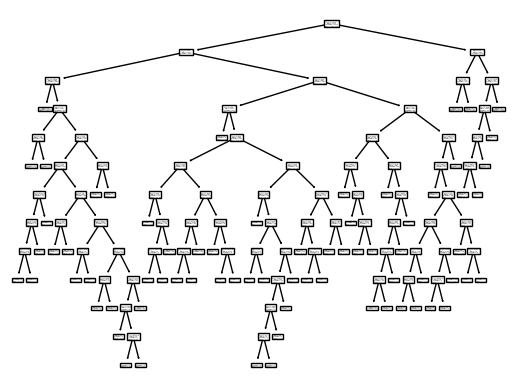

In [45]:
from matplotlib import pyplot as plt
tree.plot_tree(clf)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
print("MSE:", mean_squared_error(y_test,clf.predict(X_test)))
print("MAE:", median_absolute_error(y_test,clf.predict(X_test)))
print("R2:", r2_score(y_test,clf.predict(X_test)))

MSE: 0.0224
MAE: 0.0
R2: 0.7475130030803414


El error cuadrado medio del modelo, es relativamente bajo. Ahora respecto al problema de este arbol, puede ser el establecer la profundidad maxima del arbol para asi evitar el sobreajuste. Ya que no existe claridad de todas las opciones mostradas en el arbol de desicion. 

e) Plantee otro árbol de decisión pero definiendo como parámetro de control
o prepoda la profundidad máxima del árbol, para esto en la función
DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad
máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo
anterior. Observe el árbol obtenido. Comente.

In [50]:
clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=2021)
clf.fit(X_train, y_train)

print('Precisión modelo inicial train/test {0:.3f}/{1:.3f}'
.format(clf.score(X_train, y_train),
clf.score(X_test, y_test)))

Precisión modelo inicial train/test 0.905/0.902


In [51]:
import numpy as np

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 3 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 114.5 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


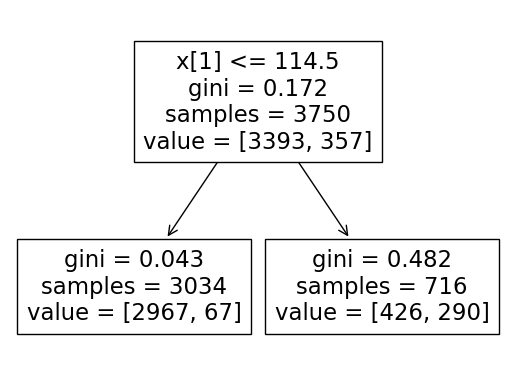

In [52]:
from matplotlib import pyplot as plt
tree.plot_tree(clf)
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
print("MSE:", mean_squared_error(y_test,clf.predict(X_test)))
print("MAE:", median_absolute_error(y_test,clf.predict(X_test)))
print("R2:", r2_score(y_test,clf.predict(X_test)))

MSE: 0.0984
MAE: 0.0
R2: -0.10913930789707194


Respecto al modelo anterior, al definir el parámetro de control o prepoda la profundidad máxima, este modelo es mucho mas claro en la toma de desiciones. Aumentando si su error cuadrado medio. 

f) Busque los mejores valores de los criterios de corte y máxima profundidad
para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint:
evalue los hiperparámetros criterion y max_depth)

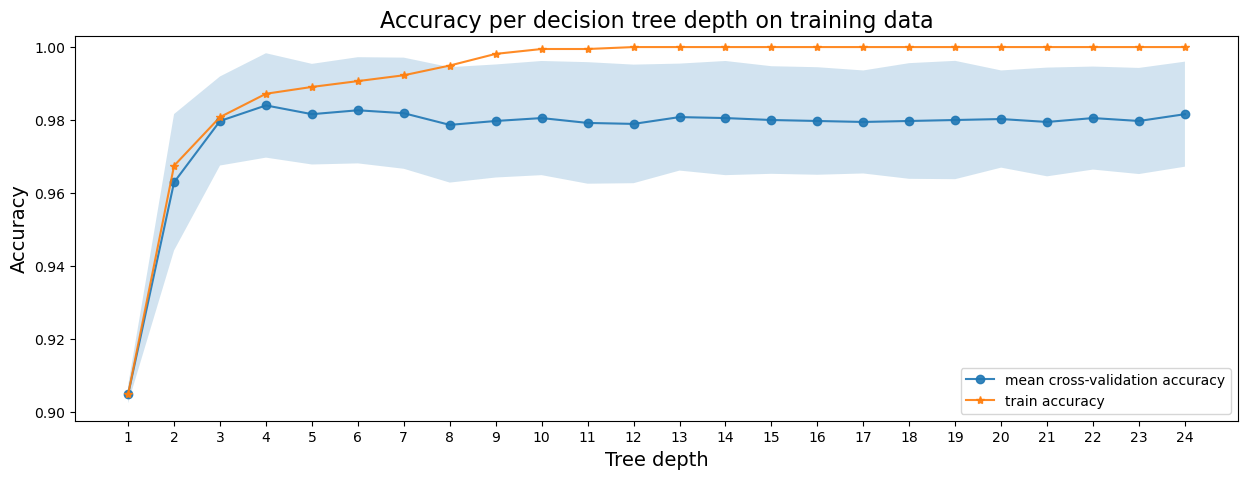

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [60]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('La mejor profundidad-{} tree tiene una cercania de validacion-cuzada {} +/- {}% en el dataset de entrenamiento'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

La mejor profundidad-4 tree tiene una cercania de validacion-cuzada 98.4 +/- 0.71554% en el dataset de entrenamiento
